<a href="https://colab.research.google.com/github/gustavor10silva/regressao_linear/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introdução

Este notebook aborda o conteúdo de Regressão Linear (simples e múltipla) e foi desenvolvido no âmbito do [Grupo CiDAMO](https://www.linkedin.com/company/grupo-cidamo).

> **Autor:** Gustavo Rodrigues da Silva
>
> **Orientador:** Profº Lucas Pedroso

## 1.1 O problema de regressão

De acordo com o site [Didática Tech](https://didatica.tech/problemas-de-classificacao-e-regressao/#:~:text=Os%20problemas%20de%20regress%C3%A3o%20existem,apresentar%20como%20resposta%20qualquer%20valor.), "Os problemas de regressão existem quando precisamos **prever um valor numérico** específico. Este valor pode ser o preço de um produto, o peso ou altura de uma pessoa, a metragem de uma casa, e assim por diante."

A regressão é um tipo de **aprendizado supervisionado**, ou seja, precisamos ter um conjunto de dados **X** que define uma variável resposta **y** para treinarmos o modelo de regressão e, com base em novos valores de **X**, conseguirmos prever um valor para **y**.

## 1.2 Exemplos



1.   Suponha que temos os valores da **renda anual (X)** de um grupo de pessoas e o **nível de satisfação (y)** dessas pessoas, de acordo com alguma métrica. Com essas informações, podemos treinar um modelo de regressão. Esse modelo fará o seguinte: quando tivermos novos valores de **renda anual (X)**, o modelo poderá prever qual será o **nível de satisfação (y)** dessas pessoas.

2.   Suponha que, para cada dia do ano de 2021, temos os valores da Taxa Selic, da Taxa de Inflação (IPCA) e o preço médio do barril de petróleo que o Brasil comprou no dia (essas são as variáveis **X**), e também temos o preço médio de venda do litro do combustível no Brasil em cada dia (variável **y**). Com base nessas variáveis **X** e no rótulo **y**, podemos treinar um modelo de regressão que servirá para prever o preço do litro do combustível **y** quando tivermos os valores das variáveis **X**.



## 1.3 Tipos de regressão

O diagrama abaixo ilustra bem os tipos de regressão existentes:

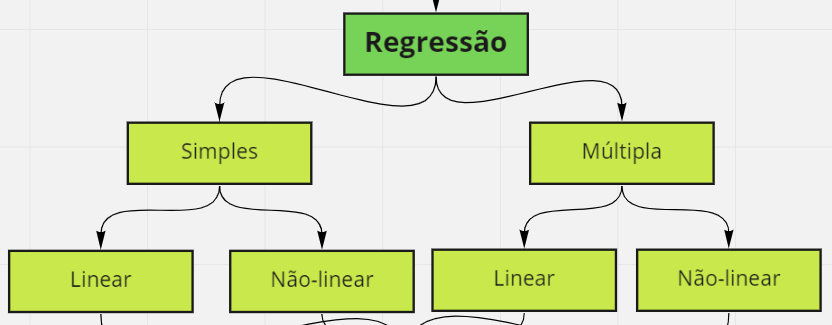

*   **Regressão simples:** quando temos **apenas uma** variável preditora (**X**), como no Exemplo 1;
*   **Regressão múltipla:** quando temos **várias** variáveis preditoras (**X**), como no Exemplo 2.

Tanto a regressão simples quanto a múltipla, se dividem entre linear e não-linear (a não-linear também é chamada de polinomial), onde:

*   **Regressão linear:** quando usamos uma função linear para se ajustar aos dados e fazer a previsão posteriormente, como uma reta;
*   **Regressão não-linear:** quando usamos uma função não-linear para se ajustar aos dados e fazer a previsão posteriormente, como uma parábola;



# 2 Regressão linear em dados gerados

Essa é a fórmula geral da regressão linear:

$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n$$

Queremos aproximar o valor de $y$ com a expressão à direita, onde:

* $\hat{y}$ é o valor predito
* $n$ é o número de variáveis preditoras
* $x_i$ é o valor da i-ésima variável
* $\theta_j$ é o j-ésimo parâmetro do modelo ($\theta_0$ é chamado de **viés** (bias), e os demais são chamados de **pesos** das variáveis)

* **Observação:** na equação acima, se $n=1$, temos uma **regressão linear simples**; caso $n>1$, temos uma **regressão linear múltipla**.

Note que a equação acima pode ser reescrita na forma matricial:

$$\hat{y} = h_\theta(x) = \theta^T \cdot x$$

Onde:

* $\theta$ é o vetor de parâmetros: $\theta = [\theta_0, \theta_1, \theta_2, \ldots, \theta_n]$
* $x$ é o vetor das variáveis preditoras: $x = [1, x_1, x_2, \ldots, x_n]$
* $\theta \cdot x$ é o produto vetorial dos vetores $\theta$ e $x$: $\theta \cdot x = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n$

Seja $y$ o vetor de rótulos reais. Estamos aproximando $y$ por $\hat{y}$, então estamos cometendo um erro $|\hat{y}_i - y_i| = |\theta^Tx_i - y_i|$. Tecnicamente, o que queremos com a regressão linear é minimizar esse erro, o que é o mesmo que minimizar o MSE (Mean Squared Error, ou Erro Quadrático Médio):

$$MSE(X, h_\theta) = \dfrac{1}{m}\sum_{i=1}^n\left(\theta^Tx_i - y_i\right)^2$$



Fonte: Hands On, Machine Learning with Scikit Learn, Keras and Tensorflow 2 - Aurélien Géron

Feita essa explicação técnica, vamos a um exemplo de aplicação com dados gerados.

Gerando os dados de **X** e **y**:

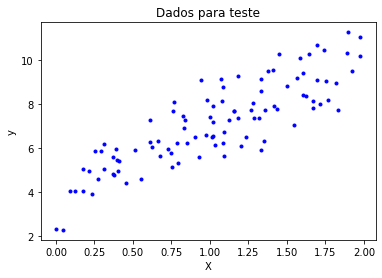

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.title('Dados para teste')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.show()

Treinando a regressão linear:

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
y_pred1 = lin_reg.predict(X)

Plotando o resultado no conjunto de treino:

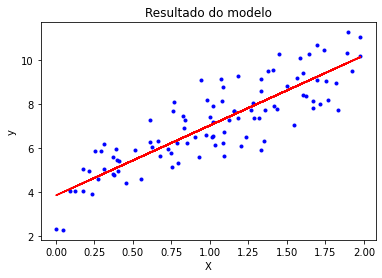

In [ ]:
plt.title('Resultado do modelo')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.plot(X, y_pred1, 'r-')
plt.show()

Note que, nesse caso, o modelo é uma reta que se ajusta bem nos pontos. As previsões serão feitas com base na equação dessa reta.

Por exemplo, se quisermos saber qual será o valor de **y** quando **x=1.5**, teremos o seguinte:

In [ ]:
X2 = [[1.5]]
y_pred2 = lin_reg.predict(X2)
y_pred2

array([[8.6355123]])

Ou seja, quando $x=1.5$ teremos $y=8.63$. Podemos ilustrar isso como segue:

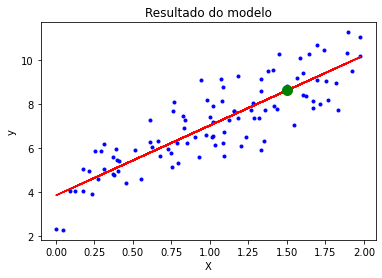

In [ ]:
plt.title('Resultado do modelo')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.plot(X, y_pred1, 'r-')
plt.plot(X2, y_pred2, 'go', markersize=10)      
plt.show()

Mas e se quisermos saber exatamente qual é a equação da reta que estamos usando como modelo? Basta usarmos os comandos:

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86298325]), array([[3.18168603]]))

Ou seja, o intercepto da reta com o eixo $y$ é $3.86$ e o coeficiente angular é $3.18$. Dessa forma, temos a seguinte equação da reta:

$$y = 3.86 + 3.18x$$

Podemos plotar essa reta em cima dos pontos gerados para ver o resultado:

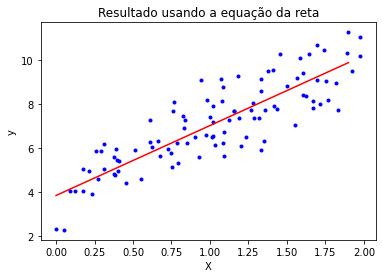

In [ ]:
plt.title('Resultado usando a equação da reta')
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, 'b.')
x = np.arange(0,2,0.1)
plt.plot(x, 3.86 + 3.18*x, 'r-')  
plt.show()

# 3 Regressão linear em um dataset

O dataset a ser usado nesta etapa é o [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), que possui dados climáticos reais.

## 3.1 Treinamento

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfólio Ciência de Dados/Supervisionado/Regressão/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Para prosseguir, poderíamos transformar as variáveis categóricas em variáveis numéricas para utilizá-las no treinamento da regressão (embora isso não seja correto; quando temos variáveis numéricas e categóricas, o correto é usarmos algoritmos apropriados para isso), mas nesse estudo simplesmente descartaremos essas variáveis e utilizaremos somente as variáveis numéricas:

In [ ]:
df = df.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


Vamos assumir que *Apparent Temperature (C)* é a variável resposta $y$ e as demais serão as variáveis preditoras $X$.

Sendo assim, vamos dividir os dados $X$ e $y$:

In [ ]:
X = df.drop(columns=['Apparent Temperature (C)'])
y = df['Apparent Temperature (C)']

Usando o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), vamos separar os dados entre treino e teste:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #33% dos dados será para teste e o restante para treino

Vamos treinar a regressão linear nos dados de treino:

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 3.2 Teste e avaliação

Agora, vamos prever os valores de `y_test` com base nos valores de `X_test`:

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([28.67161068,  8.41268673, 13.50831093, ...,  6.59375376,
       13.98630718, 21.9313592 ])

Feito isso, é hora de avaliar o quão bom foram as previsões feitas. Para isso, é necessário usarmos alguma **métrica de avaliação de regressão**. Para escolher a métrica adequada, podemos usar a [documentação do Scikit Learn](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) para as métricas de regressão. Essas são as métricas disponíveis no Scikit Learn:

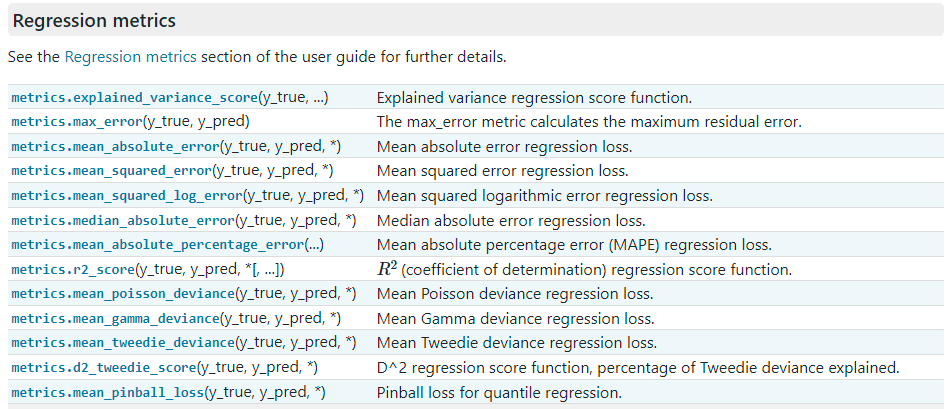

Este [artigo do Medium](https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96) é uma boa referência para entender melhor sobre cada métrica de regressão, a fórmula de cada métrica e suas vantagens e desvantagens.

Vamos avaliar o modelo primeiramente usando o *R2 Score*, que é calculado assim:

$$R^2 = 1 - \dfrac{Variância\ Residual}{Variância\ Total} = 1 - \dfrac{\sum_{i=1}^n (y_{i} - \hat{y}_{i})^2}{\sum_{i=1}^n (y_{i} - \bar{y}_{i})^2}$$

Onde:

* $y$ é o valor real de $y$;
* $\hat{y}$ é o valor predito de $y$;
* $\bar{y}$ é a média dos valores reais de $y$.

Por construção, o valor máximo do *R2 Score* é 1 (melhor pontuação), e pontuações ruins podem ser negativas.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9899285661680104

Ou então podemos avaliar o erro usando o Erro Quadrático Médio (MSE). Relembremos sua fórmula:

$$MSE = \dfrac{1}{n} \sum_{i=1}^n (\hat{y}_{i} - y_i)^2$$

Como MSE mede o Erro Quadrático Médio, a melhor pontuação é zero (menor valor possível), e essa métrica não possui um valor máximo.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.1562905214173045

É importante entender o cálculo das métricas porque isso permite que saibamos escolher melhor a métrica adequada para o problema em que estamos trabalhando.